<a href="https://colab.research.google.com/github/Bupleurum1020/AME451/blob/main/A1_Shuai_Zhao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shuai Zhao

uscid: 7722927131

#1. Write a class called MLP that inherits from torch.nn.Module.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, width, depth, activation='tanh'):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.width = width

        for i in range(depth):
            # in & out
            in_features = input_dim if i == 0 else width
            out_features = width if i < depth - 1 else output_dim
            # uniform initialization
            layer = nn.Linear(in_features, out_features)
            nn.init.uniform_(layer.weight, -1, 1)
            nn.init.uniform_(layer.bias, -1, 1)
            self.layers.append(layer)

        # activation
        if activation == 'tanh':
            self.activation_fn = torch.tanh
        elif activation == 'sin':
            self.activation_fn = torch.sin
        else:
            raise ValueError("Unsupported activation function. Choose 'tanh' or 'sin'.")

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            # no activation for last layer
            if i < len(self.layers) - 1:
                x = self.activation_fn(x)
        return x


#2. Using the above class, construct different instances of the network by fixing input dim = 2, output dim = 1, depth = 15 and varying width = 5,10,20. Repeat this with both tanh and sin activation functions.

##(a) For each configuration, calculate and print the total number of network parameters (weights and biases).
##(b) Create an 201 × 201 array of equi-spaced points in the domain [−1, 1] × [−1, 1]. Using this as the input to the network, evaluate the network prediction. This will be a 201 × 201 array of real numbers. Do this for each network configuration (6 in total). Note that there is no training involved here. Plot the output from each network in a two-dimensional contour plot. You will generate 6 such plots (one for each configuration).

Activation: tanh, Width: 5, Total parameters: 411
Activation: tanh, Width: 10, Total parameters: 1471
Activation: tanh, Width: 20, Total parameters: 5541
Activation: sin, Width: 5, Total parameters: 411
Activation: sin, Width: 10, Total parameters: 1471
Activation: sin, Width: 20, Total parameters: 5541


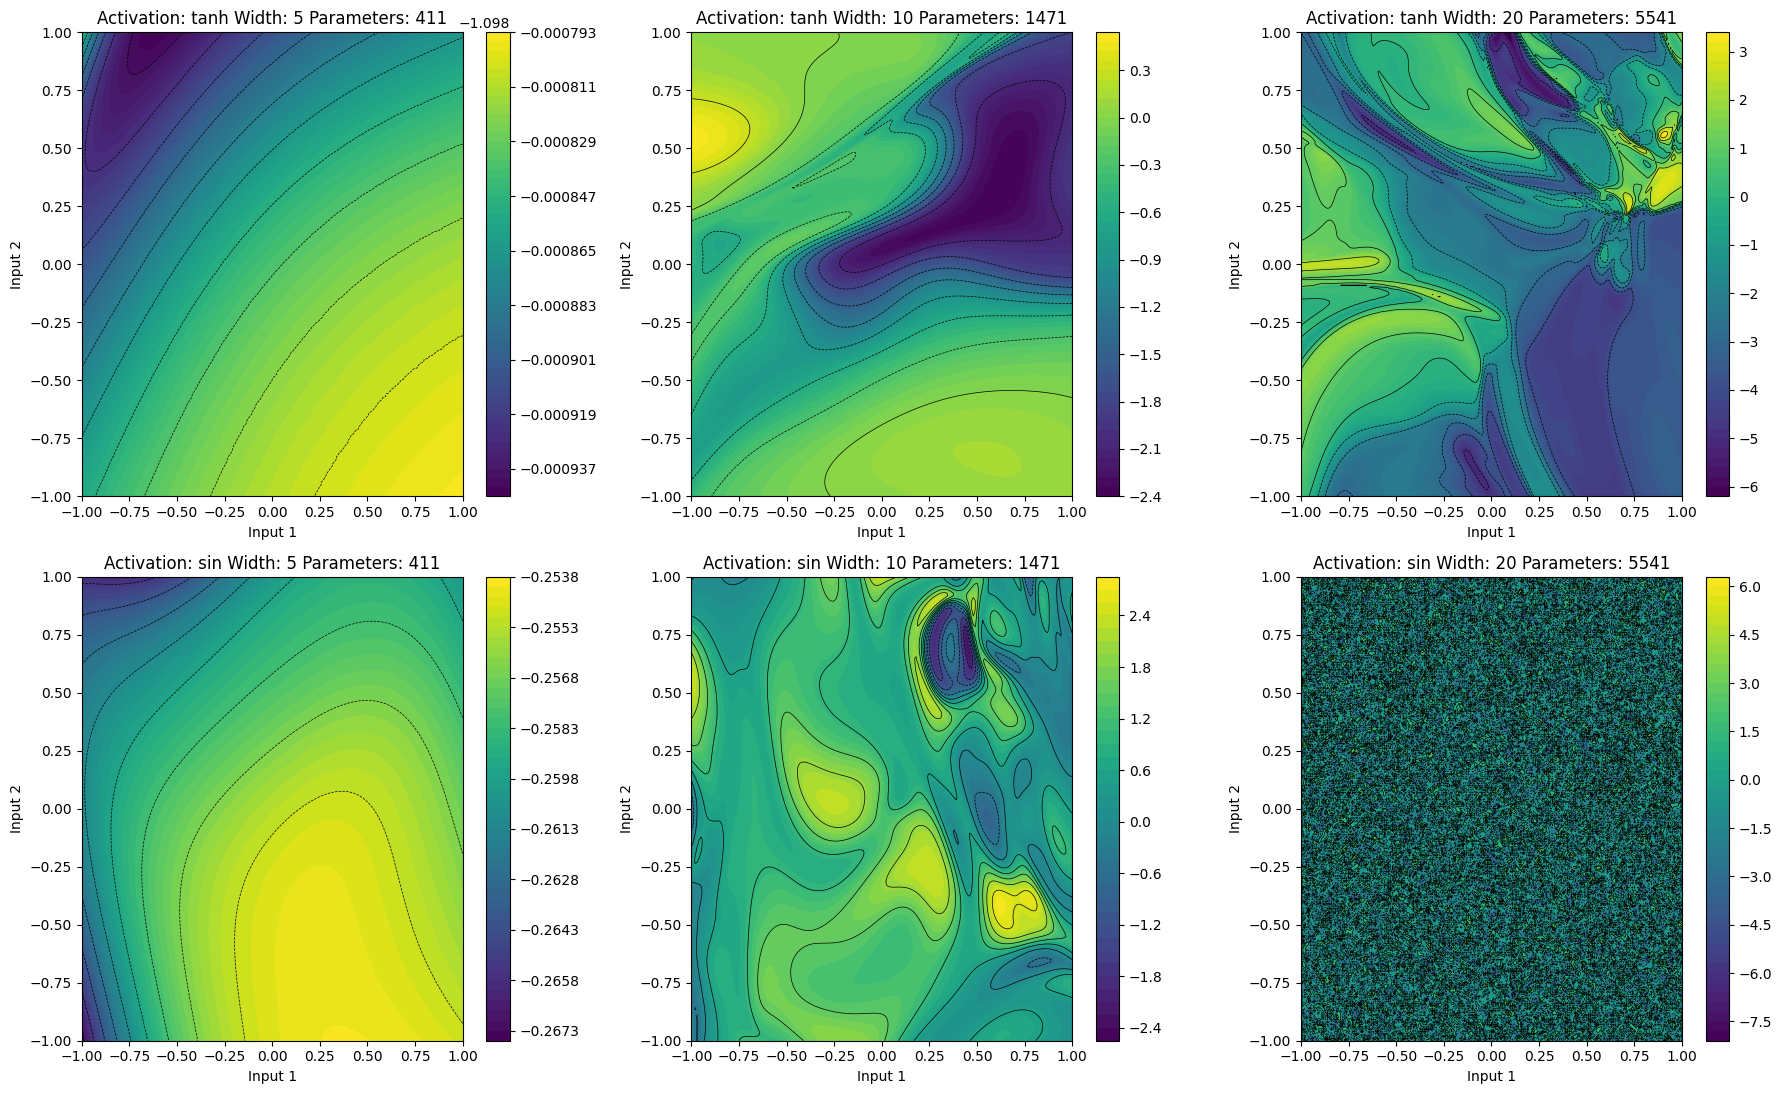

In [ ]:
def create_grid():
    # Create a grid within [-1, 1], number: 201
    x = np.linspace(-1, 1, 201)
    y = np.linspace(-1, 1, 201)
    X, Y = np.meshgrid(x, y)
    return X, Y

def plot_contours(model, activation, X, Y, ax, total_params):

    Z_input = np.vstack((X.ravel(), Y.ravel())).T

    # using model
    Z = model(torch.tensor(Z_input, dtype=torch.float32)).detach().numpy()
    Z = Z.reshape(201, 201)

    # plot contour
    cs = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax.contour(X, Y, Z, levels=10, colors='black', linewidths=0.5)
    plt.colorbar(cs, ax=ax)

    # title and axis
    ax.set_title(f'Activation: {activation} Width: {model.width} Parameters: {total_params}')
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')

# hyperparameters
input_dim = 2
output_dim = 1
depth = 15
widths = [5, 10, 20]
activations = ['tanh', 'sin']

# subplot
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# plot and cal
for i, activation in enumerate(activations):
    for j, width in enumerate(widths):
        ax = axs[i, j]
        model = MLP(input_dim, output_dim, width, depth, activation)

        # count paras
        total_params = count_parameters(model)
        print(f'Activation: {activation}, Width: {width}, Total parameters: {total_params}')

        # plot
        X, Y = create_grid()
        plot_contours(model, activation, X, Y, ax, total_params)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##(c) For a given choice of the activation function, What trends do you observe as you vary width?

As the width increases, the contour plots of the output become increasingly complex. This indicates that the network can respond to more subtle variations, but the complexity of the model grows rapidly as well.

Compared with width 5, width 10 is twice to 5, but it has nearly 3.5 times number of parameters; width 20 is 4 times to 5, but the number of parameters is 13 times greater.

##(d) What effect does the choice of activation function appear to have?

The contours of tanh tend to be symmetrical along the 45° diagonal line, which is likely related to the shape of the tanh.
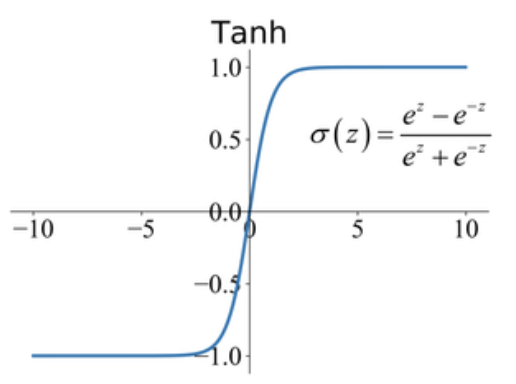

While in the plots of sin, there are many scattered small regions, and overall, they appear randomly distributed throughout the space. This is likely because the sin function is periodic among R.

##(e) Do these trends vary if you re-run the script? What is the cause of this variation, if any?

Each time the script is rerun, it generates slightly different images.

This is likely because the initialization of weights and biases are random. Different initial values lead to different results.

##(f) What is your conclusion about the expressivity of neural networks as a function of width and/or activation function?

Width can directly impact the expressivity of neural networks. As the width increases, the network becomes more sensitive, but this also leads to a huge increase in cost. Therefore, finding an appropriate width that can meet the reqs without wasting computational resources is important.

The activation function significantly alters the form of output. Different problems must require different activation functions. For example, if the input information is periodic, using sin might be a good choice. while dealing with a classification problem of 2 classes, tanh or sigmoid would be more suitable.